# Знакомство с языком Python (семинары)
## Урок 11. Jupyter Notebook и несколько слов об аналитике

### Задание 1
Дана функция:
f(x) = -12x^4\*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
Требуется:
1. Определить корни 
2. Найти интервалы, на которых функция возрастает 
3. Найти интервалы, на которых функция убывает 
4. Построить график 
5. Вычислить вершину 
6. Определить промежутки, на котором f > 0 
7. Определить промежутки, на котором f < 0 

### Решение: ###

In [1]:
# нужные библиотеки
import sympy as sym
from sympy import symbols, latex, diff, S, sin, cos
from sympy.solvers import nsolve
from sympy.plotting import plot

sym.init_printing(use_latex='mathjax') # чтобы красиво рисовать функции

In [2]:
x = symbols('x') 
# заданная функция
f = -12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30
f

      4                   3      2            
- 12⋅x ⋅sin(cos(x)) - 18⋅x  + 5⋅x  + 10⋅x - 30

## 1. Находим корни функции (ищем значения x, при которых f(x)=0)

Стандартным методом solve() корни нашей функции **f** не находятся (выдается ошибка), поэтому находим корни функции **f** с помощью численной функции nsolve на промежутке от -9 до 9. Т.к. nsolve требуется параметр, который был бы близким к значению f(x)=0, то используем list comprehansion для формирования списка корней, и оборачиваем его через set, чтобы не было дубликатов.

In [3]:
my_sol_set = list(set([nsolve(f , x) for x in range(-9, 10)]))
my_sol_set.sort()
my_sol_set

[-7.65062228513275, -5.02686592820621, -1.33896663927711, 2.27305684575625, 4.
38352369796896, 8.03516413341352]

В промежутке \[-9..9\] функция **f(x)** имеет 6 корней 

## 2,3. Интервалы, на которых функция возрастает и убывает:

Вычислим производную функции **f(x)**

In [4]:
f1 = diff(f)
f1 # производная

    4                          3                   2            
12⋅x ⋅sin(x)⋅cos(cos(x)) - 48⋅x ⋅sin(cos(x)) - 54⋅x  + 10⋅x + 10

Найдем значения x, при которых производная **f1(x)==0**

In [5]:
extremum_f_set = list(set([nsolve(f1 , x) for x in range(-9, 9) if x not in [3]])) # значение X в точке экстремума
extremum_f_set.sort()
extremum_f_set

[-9.97895376101509, -6.83137004000085, -4.16778352385048, -0.39267717993275, 0
.454573568108782, 1.70060727795121, 3.81931083338228, 7.00103165854095]

на промежутке \[-9..9\] функция **f(x)** имеет 8 экстремумов 

Интервалы монотонности функции **f(x)** найдены, теперь найдем возрастает или убывает функция в этих интервалах. Для удобства - построим pandas dataset для этого.

In [6]:
import pandas as pd
import numpy as np
my_df = pd.DataFrame({
        'x':list(extremum_f_set), 
        'f(x)':[f.subs(x,x1) for x1 in extremum_f_set],
        'f1(x)':[f1.subs(x,x1) for x1 in extremum_f_set],
        'x_mid':[extremum_f_set[i]-((extremum_f_set[i]-extremum_f_set[i+1])/2) 
                 if i<len(extremum_f_set)-1 else np.nan for i in range(0,len(extremum_f_set))],
        'f1(x_mid)':[f1.subs(x,extremum_f_set[i]-((extremum_f_set[i]-extremum_f_set[i+1])/2)) 
                     if i<len(extremum_f_set)-1 else np.nan for i in range(0,len(extremum_f_set))]
        })
my_df['f(x)_increase']=np.where(pd.isnull(my_df['f1(x_mid)']),np.nan,
                                np.where(my_df['f1(x_mid)']>0,1,-1))
my_df

,x,f(x),f1(x),x_mid,f1(x_mid),f(x)_increase
0,-9.97895376101509,107678.041644003,-4.36557456851006e-11,-8.40516190050797,-62326.4122236587,-1.0
1,-6.83137004000085,-13820.5349264727,7.27595761418343e-12,-5.49957678192566,9400.43995399484,1.0
2,-4.16778352385048,3111.36323873596,-4.54747350886464e-13,-2.28023035189162,-834.350655244124,-1.0
3,-0.392677179932750,-32.2935799364569,-1.30451205393456e-15,0.0309481940880160,10.2565645405264,1.0
4,0.454573568108782,-26.5127223650368,1.66533453693773e-15,1.07759042303000,-56.6305888734185,-1.0
5,1.70060727795121,-74.1062930861087,-1.42108547152020e-14,2.75995905566675,589.467393297391,1.0
6,3.81931083338228,872.255770291062,-9.09494701772928e-13,5.41017124596162,-12378.0422480015,-1.0
7,7.00103165854095,-25610.5096810330,-9.09494701772928e-12,NaN,NaN,NaN


В таблице приведен анализ нашей функции **f(x)** на возрастание и убывание

* x - точки экстремума функции **f(x)**
* f(x) - значения функции **f(x)**
* f1(x) - заначения производной функции **f(x)** в точках экстремума (должны быть = 0)
* x_mid - среднее значение аргумента, равное середине промежутка между двумя соседними экстремумами
* f1(x_mid) - значение производной в x_mid
* f(x)\_increase - возрастание (+1) или убывание (-1) функции **f(x)** на текущем промежутке

## 4. Построить график 

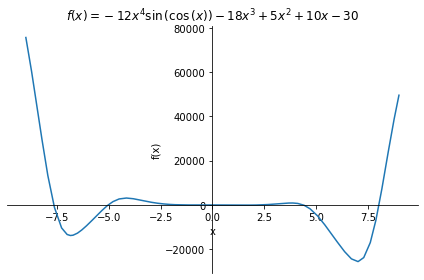

In [7]:
str= latex(S(f,evaluate = False))
p = plot(f,(x,-9,9),title='$'+'f(x)='+str+'$', show=  False)
p.show()

## 5. Вычислить вершину

Найдем максимум нашей функции **f(x)** на промежутке \[-9..9\], отбросив крайние точки, и выведем занчение x для этого максимума

In [8]:
idx = my_df[my_df['f(x)'] == my_df['f(x)'].iloc[1:-1].max()].index
my_df.loc[idx,'x']

2    -4.16778352385048
Name: x, dtype: object

Построим график в окрестности этой точки

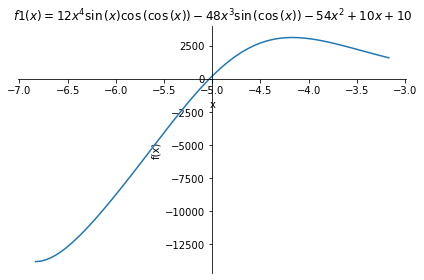

In [9]:
str= latex(S(f1,evaluate = False))
p = plot(f,(x,my_df.loc[idx-1,'x'],my_df.loc[idx,'x']+1)
         , title = '$'+'f1(x)='+str+'$', show = False) # график функции
p.show()

В точке x=-4.1677 функция **f(x)** имеет максимум на исследуемом интервале \[-9..9\]. Вычислим значение **f(x)** в этой точке

In [10]:
f.subs(x,my_df.loc[idx,'x'])

3111.36323873596

Точка (-4.1677; 3111.36) - вершина функции на промежутке \[-9..9\]

## 6, 7. Определить промежутки, на котором f > 0 и f < 0

Функция **f(x)** - возрастает и убывает на промежутках, ограниченных ее корнями. Посторим pandas dataset, аналогично промежуткам возрастания и убывания.

In [11]:
my_df2 = pd.DataFrame({
        'x':list(my_sol_set), 
        'f(x)':[f.subs(x,x1) for x1 in my_sol_set],
        'x_mid':[my_sol_set[i]-((my_sol_set[i]-my_sol_set[i+1])/2) 
                 if i<len(my_sol_set)-1 else np.nan for i in range(0,len(my_sol_set))],
        'f(x_mid)':[f.subs(x,my_sol_set[i]-((my_sol_set[i]-my_sol_set[i+1])/2)) 
                     if i<len(my_sol_set)-1 else np.nan for i in range(0,len(my_sol_set))]
        })
my_df2['f(x)_positive']=np.where(pd.isnull(my_df2['f(x_mid)']),np.nan,
                                np.where(my_df2['f(x_mid)']>0,1,-1))
my_df2

,x,f(x),x_mid,f(x_mid),f(x)_positive
0,-7.65062228513275,-1.45519152283669e-11,-6.33874410666948,-11593.6364469866,-1.0
1,-5.02686592820621,-1.36424205265939e-12,-3.18291628374166,1605.07019883190,1.0
2,-1.33896663927711,7.10542735760100e-15,0.467045103239570,-26.5174099264687,-1.0
3,2.27305684575625,8.52651282912120e-14,3.32829027186260,620.109569361101,1.0
4,4.38352369796896,-2.27373675443232e-13,6.20934391569124,-19068.9149848857,-1.0
5,8.03516413341352,3.63797880709171e-11,NaN,NaN,NaN


* x - корни функции **f(x)**
* f(x) - значения функции **f(x)** (должны быть = 0)
* x_mid - среднее значение аргумента, равное середине промежутка между двумя соседними корнями
* f1(x_mid) - значение функцции **f(x)** в x_mid
* f(x)\_positive - значение функции **f(x)** положительное (+1) или отрицательное (-1) на текущем промежутке